# TTT4185 Machine learning for Speech technology

## Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $f_0$ of the vowel.

Didn't find the frequencies and characteristics for all the vowels
Just find that the frequency for the vowel /i/ is around 280Hz, 
 so I assume that we are searching for a frequency around this one


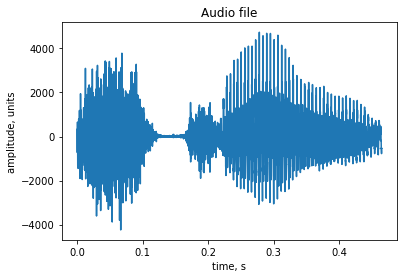

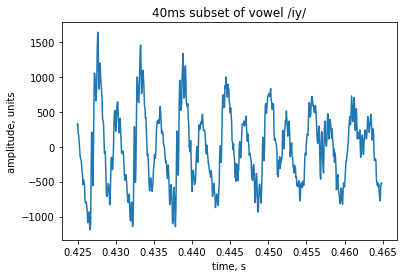

Frequency of the /iy/ vowel subset is around 347Hz


In [1]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
Fs, data = scipy.io.wavfile.read('stry.wav')

t = np.linspace(0, (1/Fs)*data.size, data.size) 

print('Didn\'t find the frequencies and characteristics for all the vowels')
print('Just find that the frequency for the vowel /i/ is around 280Hz, \n so I assume that we are searching for a frequency around this one')

# Plot the signal
fig1, ax1 = plt.subplots()
ax1.plot(t, data)
ax1.title.set_text("Audio file")
ax1.set_xlabel("time, s")
ax1.set_ylabel("amplitude, units")

# Taking 40ms subset from the end
last_vowel = data[data.size - (int((40e-3) / (1/Fs))):]
t_lv = t[data.size - (int((40e-3) / (1/Fs))):]

#Plot only the last vowel
fig2, ax2 = plt.subplots()
ax2.plot(t_lv, last_vowel)
ax2.title.set_text("40ms subset of vowel /iy/")
ax2.set_xlabel("time, s")
ax2.set_ylabel("amplitude, units")

plt.show()

### Finding the frequency of the signal
# First we try to find the two first peak
peak1 = np.argmax(last_vowel)               # Finding first max then add all the time from the begining
peak2 = np.argmax(last_vowel[peak1 + 1 : ]) # Search the second peak by removing the first one
t0 = t_lv[peak2] - t_lv[peak1]              # Calculate the period time
f0 = 1/t0                                   # Calculate the approximative frequency

print("Frequency of the /iy/ vowel subset is around {0}Hz".format(int(f0)))

(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_{10}{x}$) as a function of frequency.
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

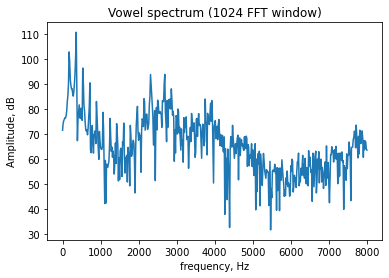

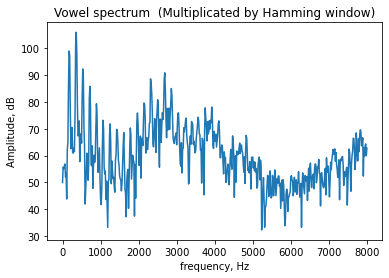

The difference between this two spectras is that by multiplying by the Hamming factors we are accentuating the difference between the peaks


In [2]:
### Estimation of the vowel spectrum using FFT ###
# Real fast fourier transformation -> Give result in frequency domain
subset = data[data.size - 1024:]
lv_spectrum = np.fft.rfft(subset, 1024)
# Result is complex so we need to get back in spectral domain
lv_spectrum_abs = np.abs(lv_spectrum)

freq = np.fft.rfftfreq(subset.size, d=(1/Fs))

fig3, ax3 = plt.subplots()

ax3.plot(freq, 20*np.log10(lv_spectrum_abs))
ax3.set_xlabel("frequency, Hz")
ax3.set_ylabel("Amplitude, dB")
ax3.title.set_text("Vowel spectrum (1024 FFT window)")

### Hamming windowing ###
hammingW = scipy.signal.windows.hamming(1024)
subsetH = np.multiply(hammingW, subset)

lv_Hspectrum = np.fft.rfft(subsetH, 1024)
# Result is complex so we need to get back in spectral domain by
lv_Hspectrum_abs = np.abs(lv_Hspectrum)

freq = np.fft.rfftfreq(subsetH.size, d=(1/Fs))
fig4, ax4 = plt.subplots()

ax4.plot(freq, 20*np.log10(lv_Hspectrum_abs))
ax4.set_xlabel("frequency, Hz")
ax4.set_ylabel("Amplitude, dB")
ax4.title.set_text("Vowel spectrum  (Multiplicated by Hamming window)")

plt.show()

print('The difference between this two spectras is that by multiplying by the Hamming factors we are accentuating the difference between the peaks')



In [3]:
i_f0 = np.argmax(20*np.log10(lv_Hspectrum_abs))
f0_spectrum = freq[ i_f0 ] # first higher peak in spectrum

### Estimation of the two first formant
iformant1 = np.argmax(20*np.log10(lv_Hspectrum_abs[i_f0 + int(i_f0) : ])) + i_f0 + int(i_f0)
formant1 = freq[ (iformant1)] # second higher peak in spectrum
formant2 = freq[ np.argmax(20*np.log10(lv_Hspectrum_abs[iformant1 + int(iformant1/4) : ])) + iformant1 + int(iformant1/4)  ] # third higher peak in spectrum
plt.show()
print("f0 finded by spectrum : {0}Hz; first formant : {1}Hz; second formant : {2}Hz".format(int(f0_spectrum), int(formant1), int(formant2)))

f0 finded by spectrum : 359Hz; first formant : 2687Hz; second formant : 3921Hz


(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it not possible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

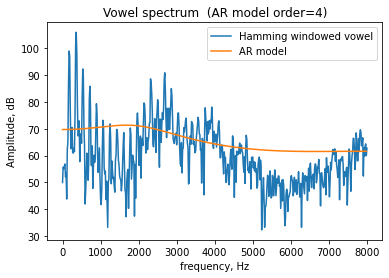

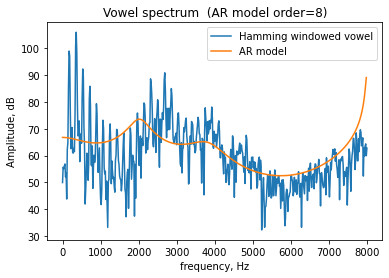

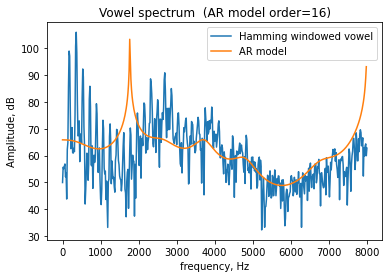

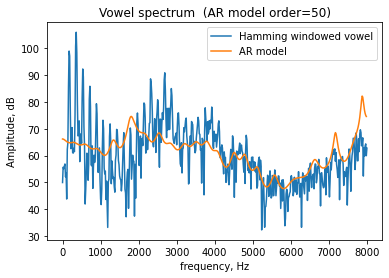

The order that best fit the signal is the order 16
Higher the order is, higher will be the precision of the envelop. So if we increase the order the envelop will fit more and more the signal spectrum
But we can't use this method to find the fundamental frequency cause the first peak is occured


In [8]:
import pysptk 

## Computation with coefficient variation
# The function LPC is returning the coefficient as [K, a1, ..., a(n)] where K is the gain and n the order
lpc4 = pysptk.sptk.lpc(subsetH, order=4)
lpc8 = pysptk.sptk.lpc(subsetH, order=8)
lpc16 = pysptk.sptk.lpc(subsetH, order=16)
lpc50 = pysptk.sptk.lpc(subsetH, order=50)

### Spectrum for each LPS order
ARspectrum = {4:{"freq":[], "fr":[]}, 8:{"freq":[], "fr":[]}, 16:{"freq":[], "fr":[]}, 50:{"freq":[], "fr":[]}}

ARspectrum[4]["freq"], ARspectrum[4]["fr"]   = scipy.signal.freqz(b=lpc4[0], a=(-lpc4[1:]), fs=Fs)
ARspectrum[8]["freq"], ARspectrum[8]["fr"]   = scipy.signal.freqz(b=lpc8[0], a=(-lpc8[1:]), fs=Fs)
ARspectrum[16]["freq"], ARspectrum[16]["fr"] = scipy.signal.freqz(b=lpc16[0], a=(-lpc16[1:]), fs=Fs)
ARspectrum[50]["freq"], ARspectrum[50]["fr"] = scipy.signal.freqz(b=lpc50[0], a=(-lpc50[1:]), fs=Fs)

for order in ARspectrum :
    fig, ax = plt.subplots()

    ax.plot(freq, 20*np.log10(lv_Hspectrum_abs), label="Hamming windowed vowel")
    ax.plot(ARspectrum[order]["freq"], 20*np.log10(np.abs(ARspectrum[order]["fr"])), label="AR model")
    ax.set_xlabel("frequency, Hz")
    ax.set_ylabel("Amplitude, dB")
    ax.title.set_text("Vowel spectrum  (AR model order={0})".format(order))
    plt.legend()
    plt.show()
# Higher the order is, higher will be the precision of the envelop. So if we increase the order the envelop will fit
# more and more the signal spectrum
print('The order that best fit the signal is the order 16')
print('Higher the order is, higher will be the precision of the envelop. So if we increase the order the envelop will fit more and more the signal spectrum')
print('But we can\'t use this method to find the fundamental frequency cause the first peak is occured')

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

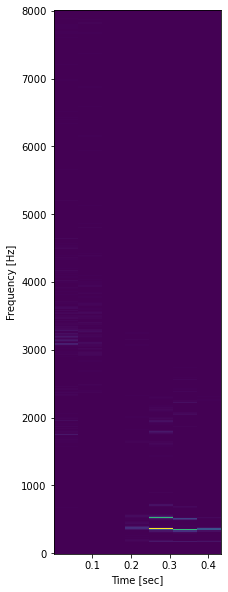

As I said before I didn't find the frequencies but we are seeing two rays under the 1000Hz and we can assume that it is correlated to the vowel /iy/ and maybe the /s/ vowel


In [5]:
f, t, Sxx = scipy.signal.spectrogram(x=data, fs=Fs,noverlap=10, nperseg=1000, nfft=1024)

plt.figure(figsize=(3,10))
plt.pcolormesh(t, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

print('As I said before I didn\'t find the frequencies but we are seeing two rays under the 1000Hz and we can assume that it is correlated to the vowel /iy/ and maybe the /s/ vowel')


### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

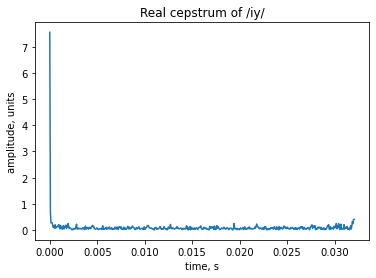

In [6]:
logFFT = np.log(lv_spectrum)
sampleiFFT = np.fft.ifft(logFFT)
t = np.linspace(0, (1/Fs)*sampleiFFT.size, sampleiFFT.size) 
#Ccoef = pysptk.sptk.fftcep()

fig6, ax6 = plt.subplots()
ax6.plot(t, np.abs(sampleiFFT))
ax6.title.set_text("Real cepstrum of /iy/")
ax6.set_xlabel("time, s")
ax6.set_ylabel("amplitude, units")

plt.show()

(b) Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in problem 1).

In [7]:
#trng = t[2e-3 : 10e-3];
trng = t[(t >= 2e-3) & (t <= 10e-3)]
crng = np.abs(sampleiFFT)[(t >= 2e-3) & (t <= 10e-3)]

imax = np.argmax(crng)

print('Complex cepstrum F0 estimate is {0}Hz.\n'.format(1/trng[imax]))
print('The frequency is quite similar as what we have found in the first part :')
print('\t - in the first part we had a frequency of {0}'.format(f0_spectrum))
print('\t - the error is about {0}%'.format(100*abs((1/trng[imax]) - f0_spectrum) / f0_spectrum ))

Complex cepstrum F0 estimate is 354.86246480398523Hz.

The frequency is quite similar as what we have found in the first part :
	 - in the first part we had a frequency of 359.375
	 - the error is about 1.2556619675867178%


(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal mus be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.